### Student Information
Name:

Student ID:

GitHub ID:

---

## Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 1. The Data

---

## 2. Data Preparation

In [2]:
# obtain the documents containing the categories provided
!pip install huggingface_hub
#!pip install fspec?

import pandas as pd

df_oringinal = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [3]:
df = df_oringinal.copy()
df.columns = ["category_name", "text"]

In [4]:
df[0:2]

category_name                                               text
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...

In [5]:
len(df)

1500

In [6]:
for t in df.iloc[0]:
    print(t)

not nostalgia
He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.


---

## 3. Data Transformation

---

### 3.1 Converting Dictionary into Pandas Dataframe
Here we will show you how to convert dictionary objects into a pandas dataframe. And by the way, a pandas dataframe is nothing more than a table magically stored for efficient information retrieval.

In [7]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

X = df
X.head()

category_name                                               text
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...

In [8]:
len(X)

1500

In [9]:
X[0:2]

category_name                                               text
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...

In [10]:
for t in X["text"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


### Adding Columns

In [11]:
# add category label also
X['category'] = X['category_name'].apply(lambda t: 0 if t == 'not nostalgia' else 1)

In [12]:
X[0:10]

category_name                                               text  category
0  not nostalgia  He was a singer with a golden voice that I lov...         0
1      nostalgia  The mist beautiful voice ever I listened to hi...         1
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0
4      nostalgia  listening to his songs reminds me of my mum wh...         1
5      nostalgia  Every time I heard this song as a child, I use...         1
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1
8  not nostalgia           Wherever you  are you always in my heart         0
9  not nostalgia  Elvis will always be number one no one can com...         0

---

### 3.2 Familiarizing yourself with the Data

In [13]:
# a simple query
X[:10][["text","category_name"]]

text  category_name
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia
5  Every time I heard this song as a child, I use...      nostalgia
6  My dad loved listening to Jim Reeves, when I w...      nostalgia
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia
8           Wherever you  are you always in my heart  not nostalgia
9  Elvis will always be number one no one can com...  not nostalgia

Let us look at a few more interesting queries to familiarize ourselves with the efficiency and conveniency of Pandas dataframes.

#### Let's query the last 10 records

In [14]:
X[-10:]

category_name                                               text  \
1490  not nostalgia  He really isn't my cup of tea, but some of his...   
1491      nostalgia  real music...how i miss those days...brings ba...   
1492      nostalgia  i used to cry over this song cause i had a boy...   
1493  not nostalgia  He really has that "love you like a brother" l...   
1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  
1490         0  
1491         1  
1492         1  
1493         0  
1494         0  
1495         0  
1496         0  
1497         0  
1498         1  
1499         1

In [15]:
# using loc (by label)
X.loc[:10, 'text']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: text, dtype: object

In [16]:
# using iloc (by position)
X.iloc[:10, 0]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
5        nostalgia
6        nostalgia
7        nostalgia
8    not nostalgia
9    not nostalgia
Name: category_name, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [17]:
#Answer here
X_sorted = X.sort_values(by='category')
print(X_sorted)

      category_name                                               text  \
22    not nostalgia  As for entertainment there was nothing, and th...   
756   not nostalgia  Does anyone know the dark haired actress ?. Th...   
755   not nostalgia  Is it me but did not the actresses of years go...   
754   not nostalgia  I really wish I could have experienced this at...   
753   not nostalgia  This is how you sing a song.  So many of the y...   
...             ...                                                ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   
18        nostalgia  My Grandparents had a pub in the 1970's, this ...   
1487      nostalgia  I really love this song. My dad always turns 6...   
17        nostalgia  It is a memory lane, I grew up listening to Ji...   

      category  
22           0  
756          0  
755          0  
754          0  
753          0  
...      

---

### **>>> Exercise 3:**  

In [18]:
# Answer here
print(X[X["category_name"] == "not nostalgia"].iloc[::10][0:5])

    category_name                                               text  category
0   not nostalgia  He was a singer with a golden voice that I lov...         0
24  not nostalgia  I like the part I'm a steam roller baby guaran...         0
51  not nostalgia  Someone says it' about a tom girl. That is a p...         0
67  not nostalgia  Tommy, No doubt, its just so weird, has a unbe...         0
89  not nostalgia  I always hear this song at my job and wondered...         0


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [19]:
# check missing values
X.isnull()

category_name   text  category
0             False  False     False
1             False  False     False
2             False  False     False
3             False  False     False
4             False  False     False
...             ...    ...       ...
1495          False  False     False
1496          False  False     False
1497          False  False     False
1498          False  False     False
1499          False  False     False

[1500 rows x 3 columns]

In [20]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

category_name                                text  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

---

### >>> **Exercise 4 :** 

In [21]:
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1) # Answer here

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

---

In [22]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [23]:
dummy_series

text        dummy_record
category               1
dtype: object

In [24]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

text category
0  dummy_record        1

In [25]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [26]:
# check if the records was commited into result
len(result_with_series)

1501

Now we that we have added the record with some missing values. Let try our function and see if it can detect that there is a missing value on the resulting dataframe.

In [27]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

category_name                                text  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

Indeed there is a missing value in this new dataframe. Specifically, the missing value comes from the `category_name` attribute. As I mentioned before, there are many ways to conduct specific operations on the dataframes. In this case let us use a simple dictionary and try to insert it into our original dataframe `X`. Notice that above we are not changing the `X` dataframe as results are directly applied to the assignment variable provided. But in the event that we just want to keep things simple, we can just directly apply the changes to `X` and assign it to itself as we will do below. This modification will create a need to remove this dummy record later on, which means that we need to learn more about Pandas dataframes. This is getting intense! But just relax, everything will be fine!

In [28]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [29]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [30]:
len(X)

1501

In [31]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

category_name                                text  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [32]:
X.dropna(inplace=True)

In [33]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

category_name                                text  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category  
0  The amoung of missing records is:   
1                                   0

In [34]:
len(X)

1500

---

### >>> **Exercise 5 ** 

In [35]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [36]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
Because "NaN" and "None" is considered as text not a state label, the isnull does not workthe 
Similarily, for "", "" is considered as a value (kind of character), so the isnull does not work.

---

### 4.2 Dealing with Duplicate Data

In [37]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [38]:
sum(X.duplicated())

1

In [39]:
sum(X.duplicated('text'))

1

In [40]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [41]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [42]:
len(X)

1502

In [43]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1497    False
1498    False
1499    False
1500    False
1501     True
Length: 1502, dtype: bool

In [44]:
sum(X.duplicated())

2

In [45]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [46]:
len(X)

1498

---

## 5.  Data Preprocessing

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

---

### 5.1 Sampling


In [47]:
X_sample = X.sample(n=1000) #random state

In [48]:
len(X_sample)

1000

In [49]:
X_sample[0:4]

category_name                                               text  \
1097  not nostalgia  She has a resonance in her voice that is uniqu...   
586       nostalgia  My mother sang this to me when I was little ty...   
561   not nostalgia  everyone should hear this song. I like this so...   
649   not nostalgia  Best video I have ever seen. Of course the son...   

      category  
1097         0  
586          1  
561          0  
649          0

---

### >>> Exercise 6 (take home):

# Answer here
Using sample() function,the order of the data we sampled would be different from the order of the data. 

---

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

category_name
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

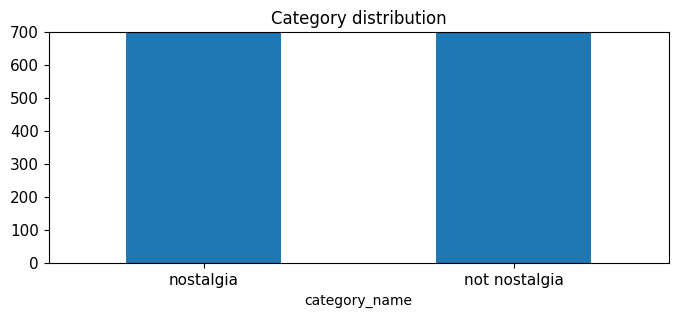

In [51]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
not nostalgia    516
nostalgia        484
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

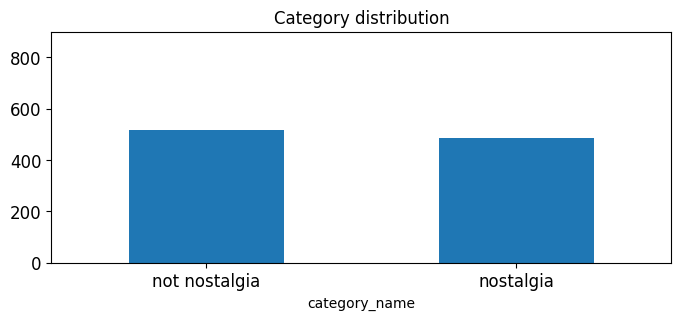

In [52]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 900], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 :**

category_name
not nostalgia    516
nostalgia        484
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

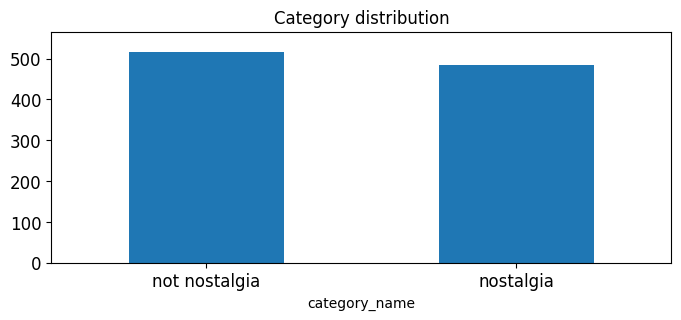

In [53]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts()+50)
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

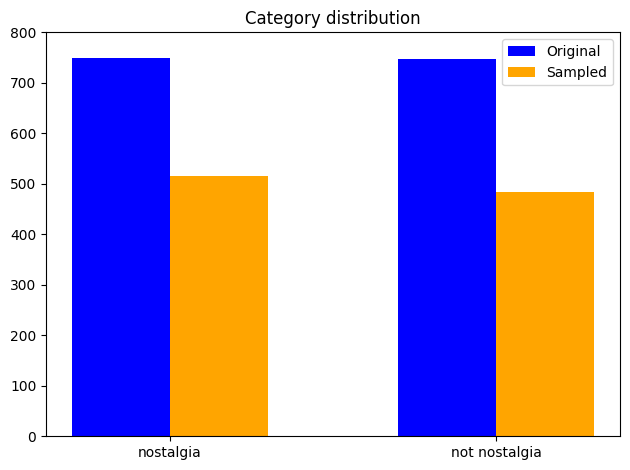

In [71]:
# Answer here
data1 = X.category_name.value_counts()
data2 = X_sample.category_name.value_counts()

bar_width = 0.3
x_axis = np.arange(2)  # 類別的 x 軸位置

plt.bar(x_axis, data1, width=bar_width, label='Original', color='blue')
plt.bar(x_axis + bar_width, data2, width=bar_width, label='Sampled', color='orange')

plt.title('Category distribution')
plt.xticks(x_axis + bar_width / 2, data1.index)  # 使 x 軸標籤位於兩個條形中間
plt.ylim(0, max(data1.max(), data2.max()) + 50)  # 設定 y 軸範圍
plt.legend()

# 顯示圖形
plt.tight_layout()
plt.show()

---

### 5.2 Feature Creation

In [55]:
import nltk

In [56]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [57]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [58]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [59]:
X[0:4]

category_name                                               text  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [60]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

---

### 5.3 Feature subset selection

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [64]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (Watch Video):**

In [65]:
# Answer here
analyze(X.text[0])
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [66]:
# We can check the shape of this matrix by:
X_counts.shape

(1498, 3730)

In [67]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [68]:
X_counts.shape

(1498, 3730)

In [69]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [70]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

### **>>> Exercise 10 (take home):**

In [72]:
# Answer here
array = X_counts[4, 0:100].toarray()
for i in range(1,100):
    val = array[0][i]
    if val == 1:
        ch = count_vect.get_feature_names_out()[i]
        print(ch)

In [73]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [74]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [75]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

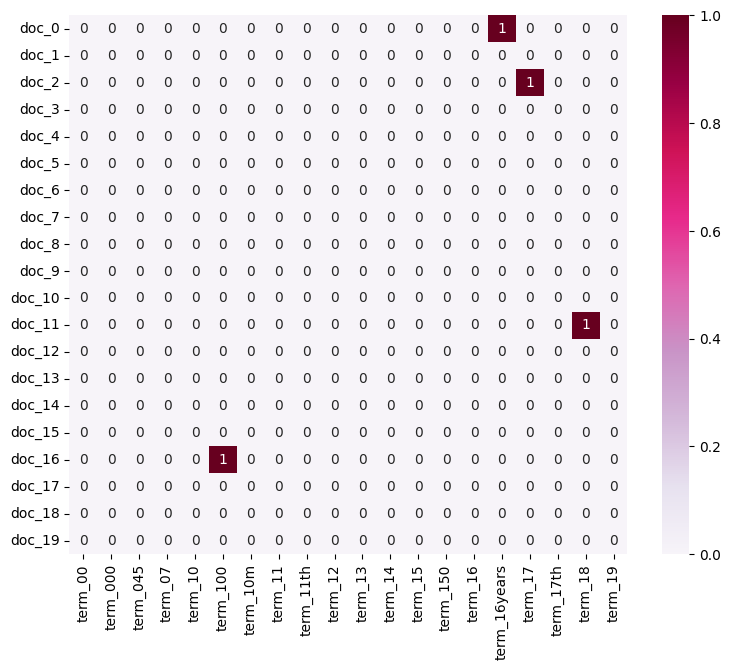

In [76]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 

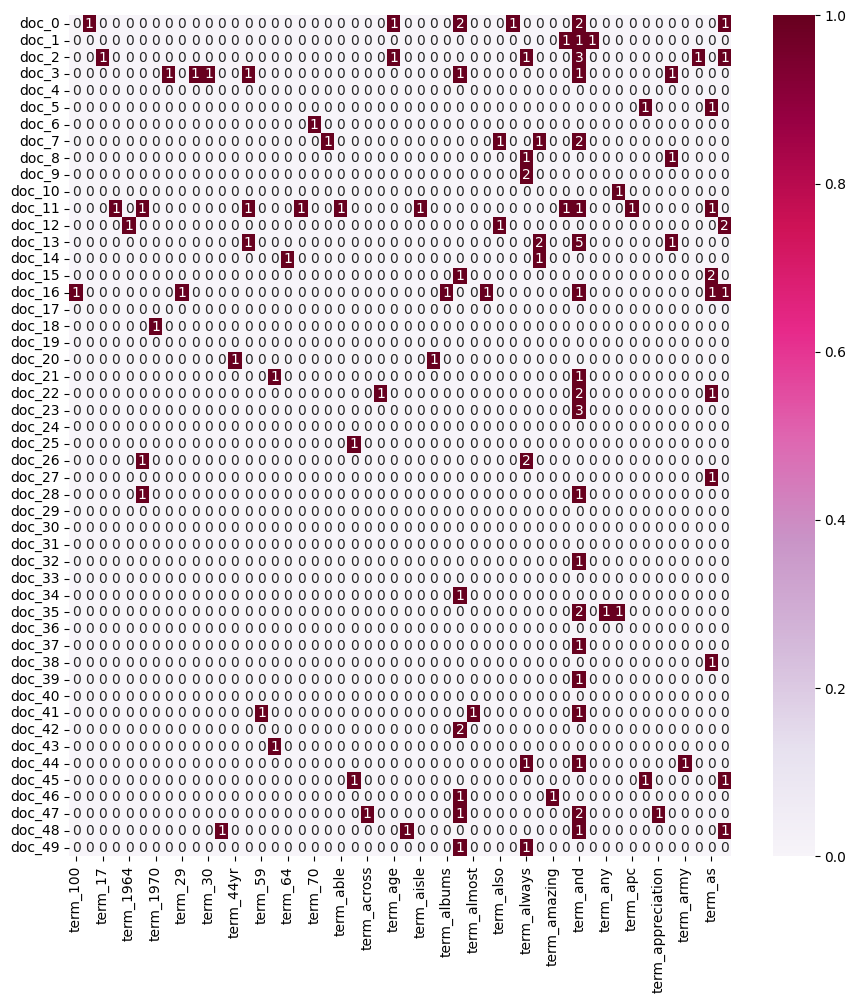

In [77]:
# Answer here
import seaborn as sns
term_bound = 50
doc_bound = 50

part_array = X_counts[0:doc_bound, :].toarray()
bool_array = np.zeros(X_counts.shape[1], dtype=bool)

str_list = []
for i in range(X_counts.shape[1]):
    if any(part_array[:,i] >= 1):
        bool_array[i] = True
        str_list.append(count_vect.get_feature_names_out()[i])
    else:
        bool_array[i] = False
partterm = part_array[:, bool_array][:,0:term_bound]
#print(partterm.shape)
#print(str_list[0:term_bound])

plot_x = ["term_"+str(i) for i in str_list[0:term_bound]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:doc_bound]]
plot_z = partterm[0:term_bound, 0:doc_bound] #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 9))
plt.tight_layout()
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Attribute Transformation / Aggregation

In [78]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [79]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [80]:
term_frequencies[0] #sum of first term: 00

np.int64(1)

C:\Users\USER\AppData\Local\Temp\ipykernel_24344\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


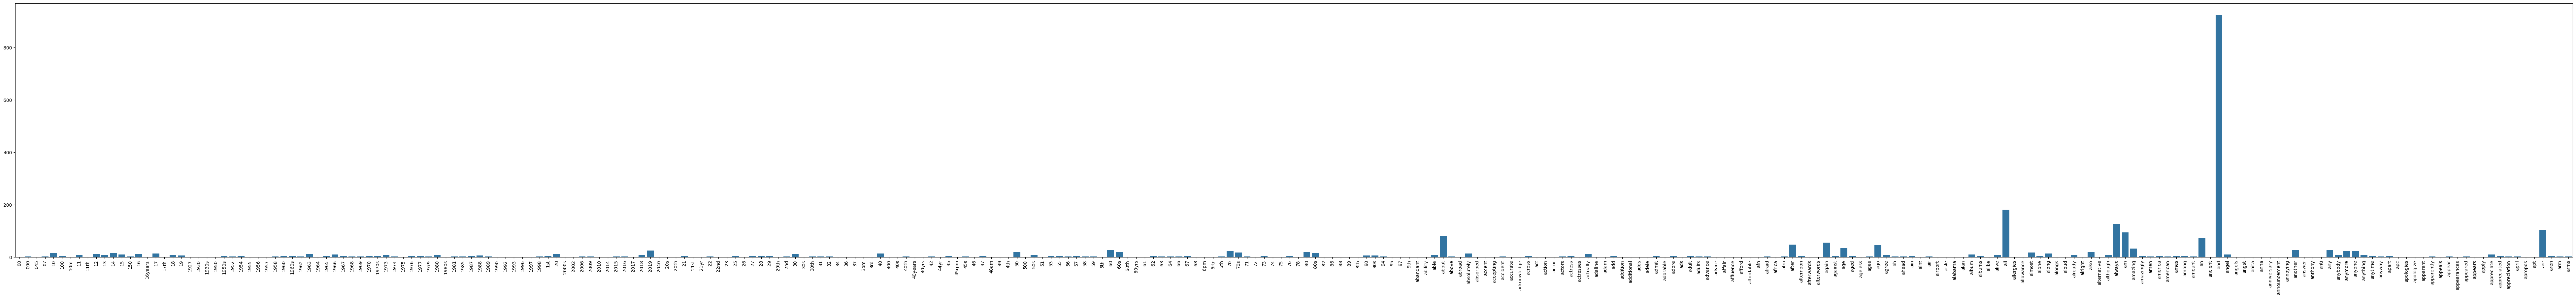

In [81]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12 (take home):**

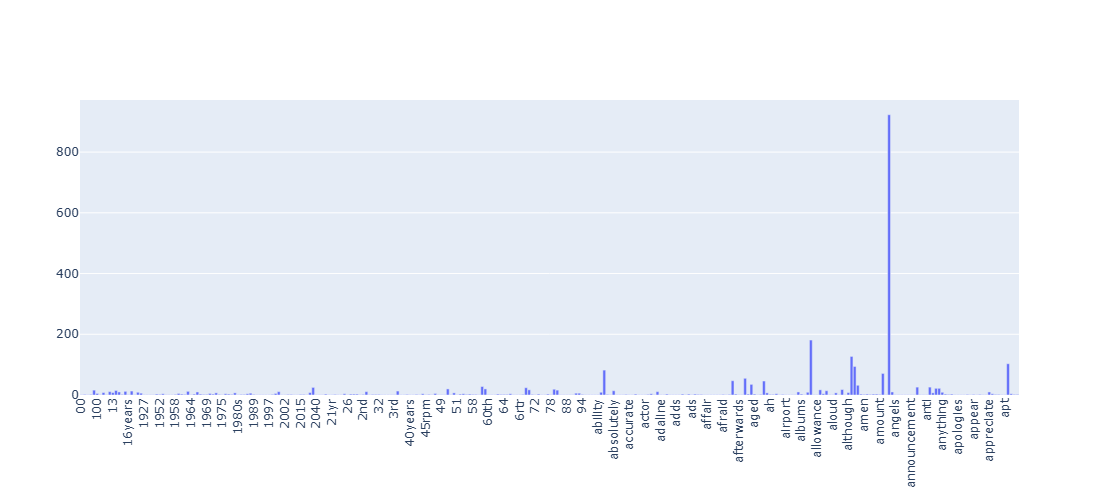

In [82]:
import plotly.graph_objects as go
import plotly.express as px

words = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]
fig = go.Figure([go.Bar(x=words, y=frequencies)])
fig.update_layout( xaxis_tickangle=-90,  height=500, width=1500, bargap=0.1)
fig.show()

# Answer here

### >>> **Exercise 13 (take home):** 

(300,)
(66,)
(66,)


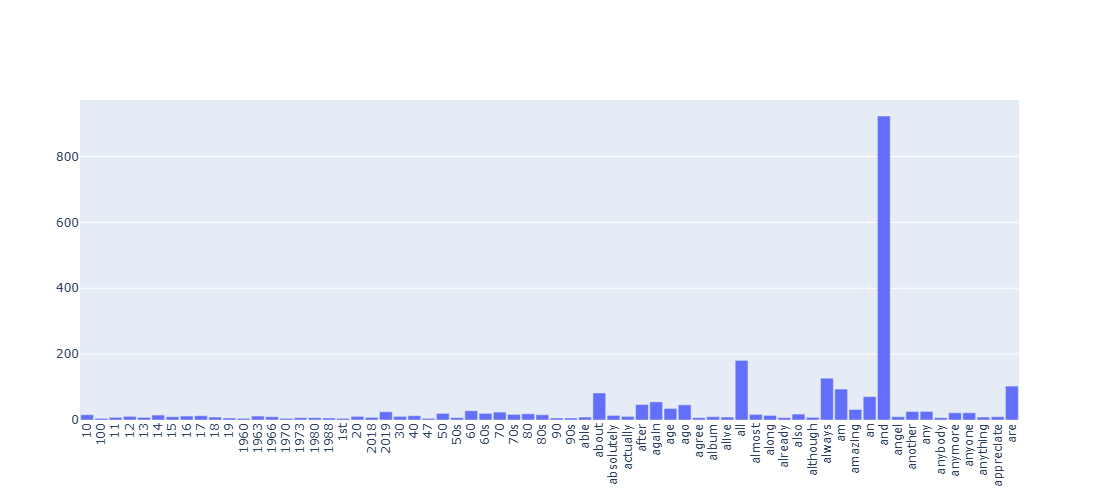

In [83]:
# Answer here
import plotly.graph_objects as go
import plotly.express as px

words = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

threshold = 5
bool_thre = (term_frequencies[:300] >= threshold)
part_w = words[bool_thre]
part_f = frequencies[bool_thre]
print(bool_thre.shape)
print(part_w.shape)
print(part_f.shape)

fig = go.Figure([go.Bar(x=part_w, y=part_f)])
fig.update_layout( xaxis_tickangle=-90,  height=500, width=1500, bargap=0.1)
fig.show()

---

### >>> **Exercise 14: use decreasing order** 

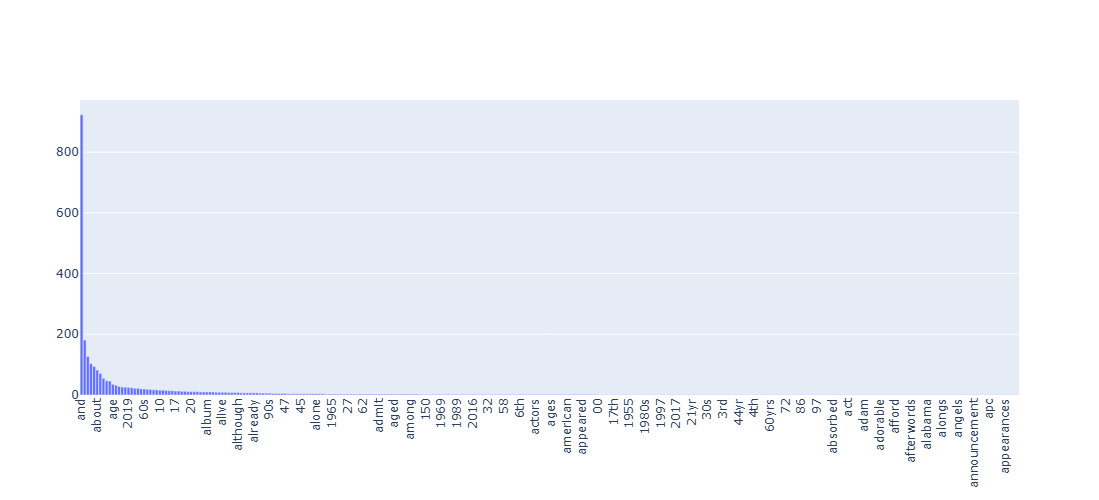

In [84]:
# Answer here
import plotly.graph_objects as go
import plotly.express as px

words = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies[:300]

#threshold = 5
#bool_thre = (term_frequencies[:300] >= threshold)
#part_w = words[bool_thre]
#part_f = frequencies[bool_thre]
#print(bool_thre.shape)
#print(part_w.shape)
#print(part_f.shape)
wfdict = {}
for w,f in zip(words, frequencies):
    wfdict[w] = f
wfdict_sort = dict(sorted(wfdict.items(), key=lambda item: item[1], reverse=True))
#print(wfdict)
#print(wfdict_sort)
w_sorted = []
f_sorted = []
for w,f in wfdict_sort.items():
    w_sorted.append(w)
    f_sorted.append(f)

fig = go.Figure([go.Bar(x=w_sorted, y=f_sorted)])
fig.update_layout( xaxis_tickangle=-90,  height=500, width=1500, bargap=0.1)
fig.show()

In [85]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\USER\AppData\Local\Temp\ipykernel_24344\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



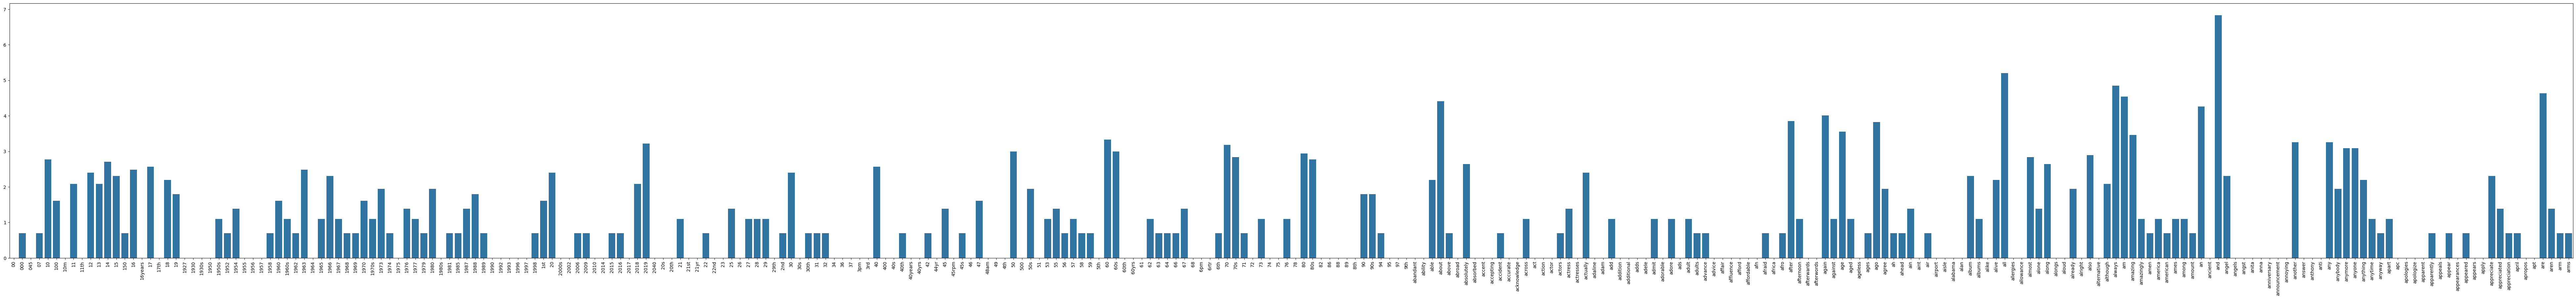

In [86]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
use the 'term_frequencies_log'

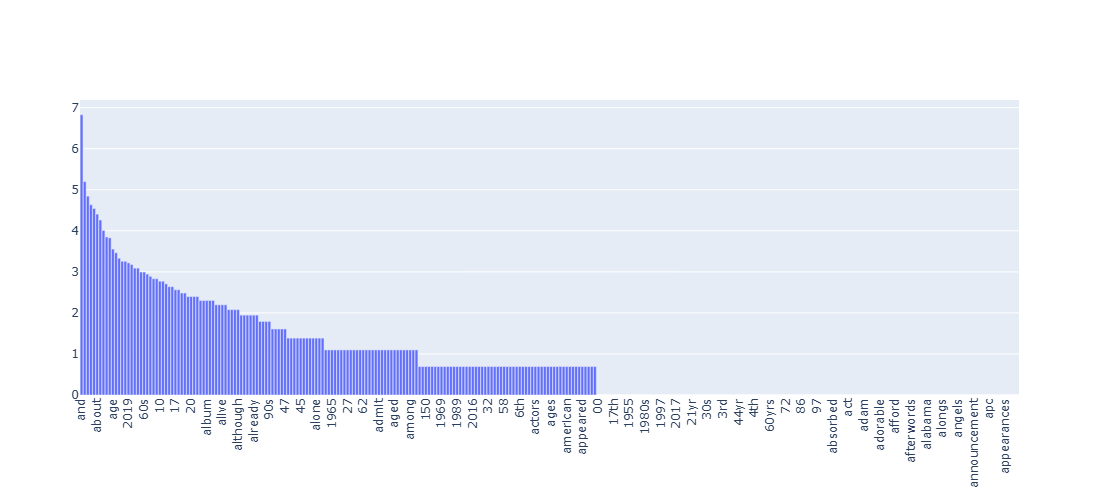

In [87]:
# Answer here
import plotly.graph_objects as go
import plotly.express as px
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]
words = count_vect.get_feature_names_out()[:300]
frequencies = term_frequencies_log[:300]

wfdict = {}
for w,f in zip(words, frequencies):
    wfdict[w] = f
wfdict_sort = dict(sorted(wfdict.items(), key=lambda item: item[1], reverse=True))
w_sorted = []
f_sorted = []
for w,f in wfdict_sort.items():
    w_sorted.append(w)
    f_sorted.append(f)

fig = go.Figure([go.Bar(x=w_sorted, y=f_sorted)])
fig.update_layout( xaxis_tickangle=-90,  height=500, width=1500, bargap=0.1)
fig.show()

# Observation: use term_frequencies_log will shrink the difference of long-tail phenomenon

###  Finding frequent patterns

In [88]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [89]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
743     0         0      0        0    0    0        0      0  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     1         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  

[748 rows x 2602 columns]

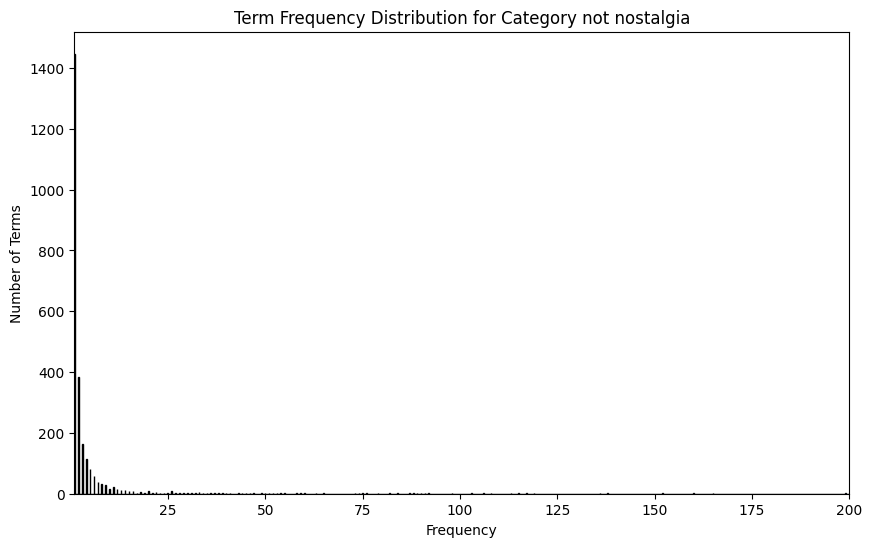

In [90]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [96]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'and', 'this', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'songs', 'beautiful', 'as', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'more', 'if', 'we', 'best', 'by', 'ever', 'think', 'would', 'thank', 'only', 'still', 'how', 'don', 'has', 'very', 'am', 'there', 'out', 'him', 'could', 'these', 'up', 'old', 'listen', 'hear', 'do', 'singer', 'an', 'many', 'had', 'here', 'version', 'too', 'such', 'today', 'been', 'world', 'your', 'people', 'most', 'get', 'some', 'video', 'man', 'listening', 'heard', 'sing', 'than', 'were', 'years', 'real', 'heart', 'nice', 'singing', 'their', 'better', 'life', 'its', 'day', 'sad', 'god', 'then', 'way', '

In [97]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 451, 451, ...,   1,   1,   1])

In [98]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276,  160, 2290, ..., 2600,   12,    7])

In [99]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(708)

In [100]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['12', '16years', 'zealand', 'sensitive', 'sense', 'xd', 'wwii', 'wuv', 'writers', 'writer', 'wrenching', 'wouldn', '1998', 'measure', 'spine', 'spewing', '2040', '2018', '2017', '2010', '1957', '1955', '1952', '1930s', '1930', '17th']


Here we can explore the frequencies of the **bottom 1%** words:

In [105]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 451, 708])

In [106]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   7,   12, 2600, ..., 2290,  160, 2276])

In [107]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
classic     23
wish        24
any         25
          ... 
of         361
to         394
this       451
and        451
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

00  000  045  10  100  10m  11  14  15  150  ...  young  younger  \
0     0    0    0   0    0    0   0   0   0    0  ...      0        0   
1     0    0    0   0    0    0   0   0   0    0  ...      0        0   
2     0    0    0   0    0    0   0   0   0    0  ...      0        0   
3     0    0    0   0    0    0   0   0   0    0  ...      0        0   
4     0    0    0   0    0    0   0   0   0    0  ...      0        0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ...  ...    ...      ...   
743   0    0    0   0    0    0   0   0   0    0  ...      0        0   
744   0    0    0   0    0    0   0   0   0    0  ...      0        0   
745   0    0    0   0    0    0   0   0   0    0  ...      0        0   
746   0    0    0   0    0    0   0   0   0    0  ...      0        0   
747   0    0    0   0    0    0   0   0   0    0  ...      0        0   

     youngest  youngsters  yourself  youth  youtube  yrs  yuo  zulus  
0           0           0         0      0        0    0    0      0  
1           0           0         0      0        0    0    0      0  
2           0           0         0      0        0    0    0      0  
3           0           0         0      0        0    0    0      0  
4           0           0         0      0        0    0    0      0  
..        ...         ...       ...    ...      ...  ...  ...    ...  
743         0           0         0      0        0    0    0      0  
744         0           0         0      0        0    0    0      0  
745         0           0         0      0        0    0    0      0  
746         0           0         0      0        0    0    0      0  
747         0           0         0      0        0    0    0      0  

[748 rows x 2446 columns]

### >>> **Exercise 16 (take home):** 

Difference:
Both for bottom 1.0% and par of top 5% words, they are category-specific jargon or names.
Like, in the topic of "comp.graphics", there are technical words. 
In soc.religion.christian and alt.atheism, there are philosophical terms.

Similarity:
There are common stop words in all categories, reflecting the general structure of the English language.
(e.g., is, that, in).

In [108]:
from PAMI.extras.DF2DB import DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    print(category)
    if category == "comp.graphics":
        #df_selected_columns = term_document_dfs[category].iloc[:, 6490:6491]
        df = term_document_dfs[category]
        df.rename(columns={'ingénieur': 'ingenieur'}, inplace=True)
        df.rename(columns={'deluxeý': 'deluxey'}, inplace=True)
        #df = term_document_dfs[category].iloc[:, 4050:4070 ] #6490
        #print(df.iloc[:, 6491])
        #print(df.keys())
        obj = db.DenseFormatDF(df)
        obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
    else :
    # Create the DenseFormatDF object and convert to a transactional database
        obj = db.DenseFormatDF(term_document_dfs[category])
        obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)
   

not nostalgia
nostalgia


Now let us look into the stats of our newly created transactional databases, we will observe the following:

- **Database Size (Total Number of Transactions)**: Total count of transactions in the dataset.

- **Number of Items**: Total count of unique items available across all transactions.

- **Minimum Transaction Size**: Smallest number of items in any transaction, indicating the simplest transaction.

- **Average Transaction Size**: Mean number of items per transaction, showing the typical complexity.

- **Maximum Transaction Size**: Largest number of items in a transaction, representing the most complex scenario.

- **Standard Deviation of Transaction Size**: Measures variability in transaction sizes; higher values indicate greater diversity.

- **Variance in Transaction Sizes**: Square of the standard deviation, providing a broader view of transaction size spread.

- **Sparsity**: Indicates the proportion of possible item combinations that do not occur, with values close to 1 showing high levels of missing combinations.

With regards to the graphs we will have: 

- **Item Frequency Distribution**
    - Y-axis (Frequency): Number of transactions an item appears in.
    - X-axis (Number of Items): Items ranked by frequency.

- **Transaction Length Distribution**
    - Y-axis (Frequency): Occurrence of transaction lengths.
    - X-axis (Transaction Length): Number of items per transaction.

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.405369127516778
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.966526146738824
Variance in Transaction Sizes : 35.64728296168002
Sparsity : 0.9965636266853979


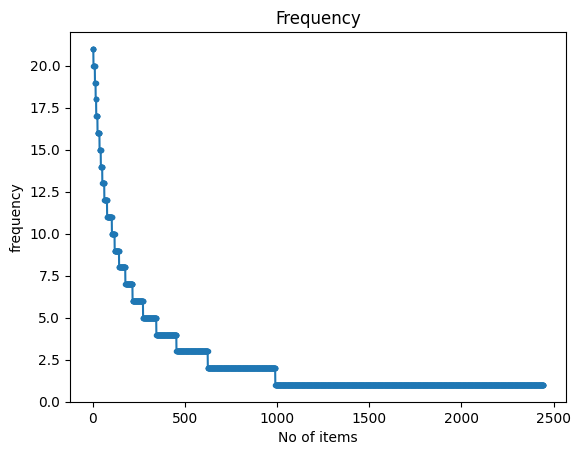

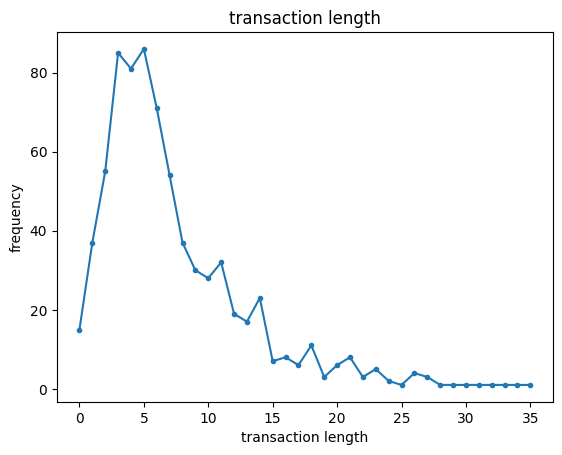

In [109]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


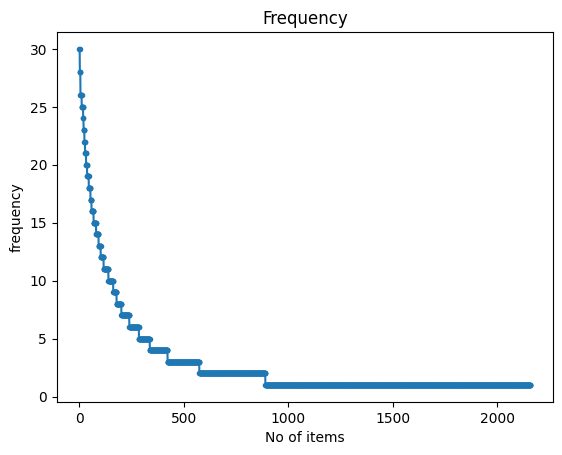

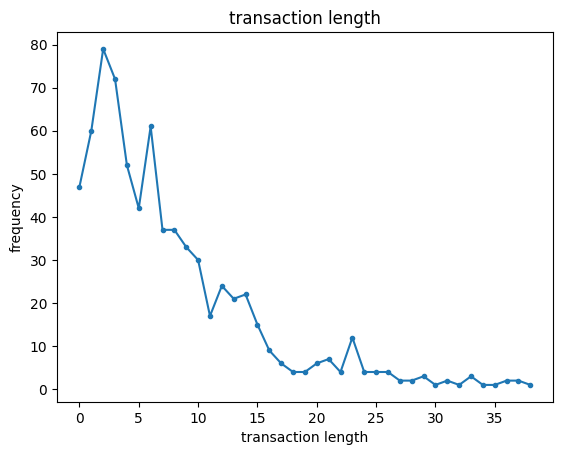

In [110]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [119]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_not_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.014999151229858398


In [124]:
obj1.save('freq_patterns_not nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [121]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.01901721954345703


In [123]:
obj2.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177        go       28
178     takes       30
179  favorite       30

[180 rows x 2 columns]

In [125]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_not_nostalgia, frequentPatternsDF_nostalgia]

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
219     takes       30
217      ever       28
218     would       28
216      wish       26
215        or       26
..        ...      ...
95   together        9
96      along        9
97         tv        9
101     karen        9
100     place        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [126]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])
# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  player  its  until  \
0      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
2      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
3      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
4      0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...    ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   

      records  left  together  along  tv  karen  place  
0           0     0         0      0   0      0      0  
1           0     0         0      0   0      0      0  
2           0     0         0      0   0      0      0  
3           0     0         0      0   0      0      0  
4           0     0         0      0   0      0      0  
...       ...   ...       ...    ...  ..    ...    ...  
1495        0     0         0      0   0      0      0  
1496        0     0         0      0   0      0      0  
1497        0     0         0      0   0      0      0  
1498        0     0         0      0   0      0      0  
1499        0     0         0      0   0      0      0  

[1498 rows x 3950 columns]

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze 

In [127]:
# Answer Here
#from PAMI.frequentPattern.basic import FPGrowth as alg

#minSup=9
#obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
#obj3.mine()
#frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
#print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
#print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime
#obj3.save('freq_patterns_comp_graphics_minSup9.txt') #save the patterns
#frequentPatternsDF_comp_graphics

from PAMI.frequentPattern.topk import FAE as alg
k_values = [500, 1000, 1500]
for k in k_values:
    obj = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
    obj.mine()
    topKFrequentPatterns = obj.getPatternsAsDataFrame()
    print(f"Total number of Frequent Patterns with FAE with k:{k}:", len(topKFrequentPatterns))
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    obj.save(f"freq_patterns_comp_graphics_FAEwithk{k}.txt")
    print(topKFrequentPatterns)

from PAMI.frequentPattern.maximal import MaxFPGrowth as alg
mins = [3,6,9]
for m in mins:
    obj = alg.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=m)
    obj.mine()
    maxFrequentPatterns = obj.getPatternsAsDataFrame()
    print(f"Total number of Frequent Patterns with max with minsup:{m}:", len(maxFrequentPatterns))
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    obj.save(f"freq_patterns_comp_graphics_maxwithminsup_{m}.txt")
    print(maxFrequentPatterns)

# Our finding:
'''
for similarity:
    Patterns with highest frequency are the same across different algorithm. 
    (e.g. done with 25; life with 24; tried with 24)

for difference:
    run time:
        for FAE topK:The runtime increases almost linearly with the size of k.
        for maxFPGrowth, as minsup increases, run time decreases rapidly
    Pattern difference:
        for FAE topK:extract number of "K" pattern, the patterns it found would based on the number of K
        for MaxFPGrowth:under minsup = 9, it extracts 660 patterns
                        the algorithm extracts less number of pattern, finding the smallest subset that cannot
                        be expanded
        for MinFPGrowth:under minsup = 9, it extracts 33574 patterns that are beyond minsup:9
                        the algorithm extracts more number of pattern, finding the largest subset that cannot 
                        be compressed
'''

 TopK frequent patterns were successfully generated using FAE algorithm.
Total number of Frequent Patterns with FAE with k:500: 500
Runtime: 0.9903922080993652
                                              Patterns  Support
0                                                 done       25
1                                                 life       24
2                                                ideas       24
3                                                 feel       24
4                                                tried       24
..                                                 ...      ...
495  posts curious concerning proposed learn forum ...       12
496  convenience posts curious concerning proposed ...       12
497  posts curious concerning proposed learn forum ...       12
498  posts curious concerning proposed learn forum ...       12
499  curious concerning proposed learn forum person...       12

[500 rows x 2 columns]
 TopK frequent patterns were successfully genera

'\nfor similarity:\n    Patterns with highest frequency are the same across different algorithm. \n    (e.g. done with 25; life with 24; tried with 24)\n\nfor difference:\n    run time:\n        for FAE topK:The runtime increases almost linearly with the size of k.\n        for maxFPGrowth, as minsup increases, run time decreases rapidly\n    Pattern difference:\n        for FAE topK:extract number of "K" pattern, the patterns it found would based on the number of K\n        for MaxFPGrowth:under minsup = 9, it extracts 660 patterns\n                        the algorithm extracts less number of pattern, finding the smallest subset that cannot\n                        be expanded\n        for MinFPGrowth:under minsup = 9, it extracts 33574 patterns that are beyond minsup:9\n                        the algorithm extracts more number of pattern, finding the largest subset that cannot \n                        be compressed\n'

In [128]:
# the finding is written in the cell above

---

### 5.4.2 TF-IDF

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 假設有一組文本數據

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(X['text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
import pandas as pd
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

#print(df_tfidf)

       00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1493  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  yout

In [165]:
df_tfidf.iloc[:5,:300]

00  000  045   07   10  100  10m   11  11th   12  ...  appreciate  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...         0.0   

   appreciated  appreciation  april  apropos  apt       are  aren  arm  arms  
0          0.0           0.0    0.0      0.0  0.0  0.000000   0.0  0.0   0.0  
1          0.0           0.0    0.0      0.0  0.0  0.000000   0.0  0.0   0.0  
2          0.0           0.0    0.0      0.0  0.0  0.000000   0.0  0.0   0.0  
3          0.0           0.0    0.0      0.0  0.0  0.080759   0.0  0.0   0.0  
4          0.0           0.0    0.0      0.0  0.0  0.000000   0.0  0.0   0.0  

[5 rows x 300 columns]

### 5.5 Dimensionality Reduction
- **Principal Component Analysis (PCA)**
- **t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
- **Uniform Manifold Approximation and Projection (UMAP)**:

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
[t-SNE Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[UMAP Algorithm](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)

**Input:** Raw term-vector matrix

**Output:** Projections 

In [129]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [130]:
X_pca_tdm.shape

(1498, 2)

In [131]:
X_tsne_tdm.shape

(1498, 2)

In [132]:
X_umap_tdm.shape

(1498, 2)

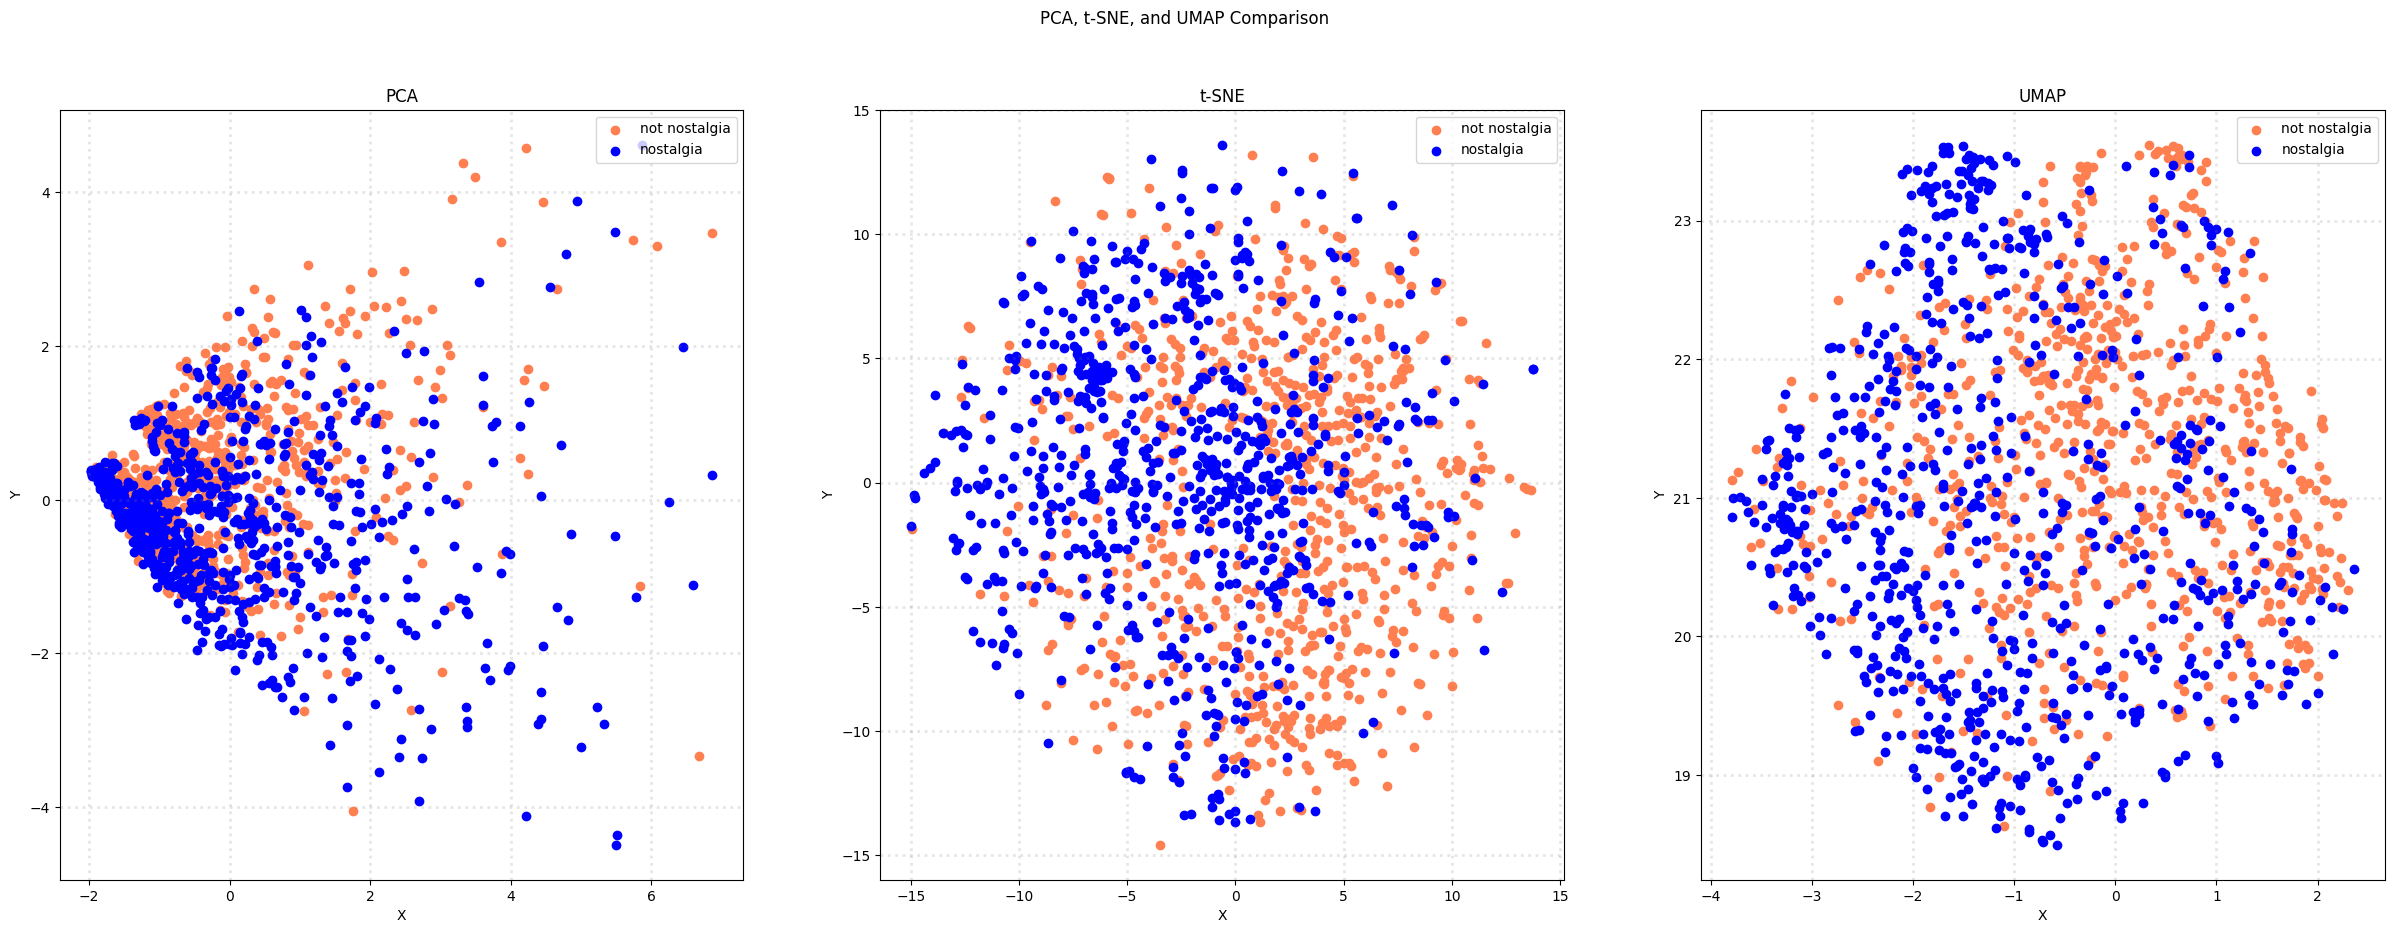

In [133]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [134]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

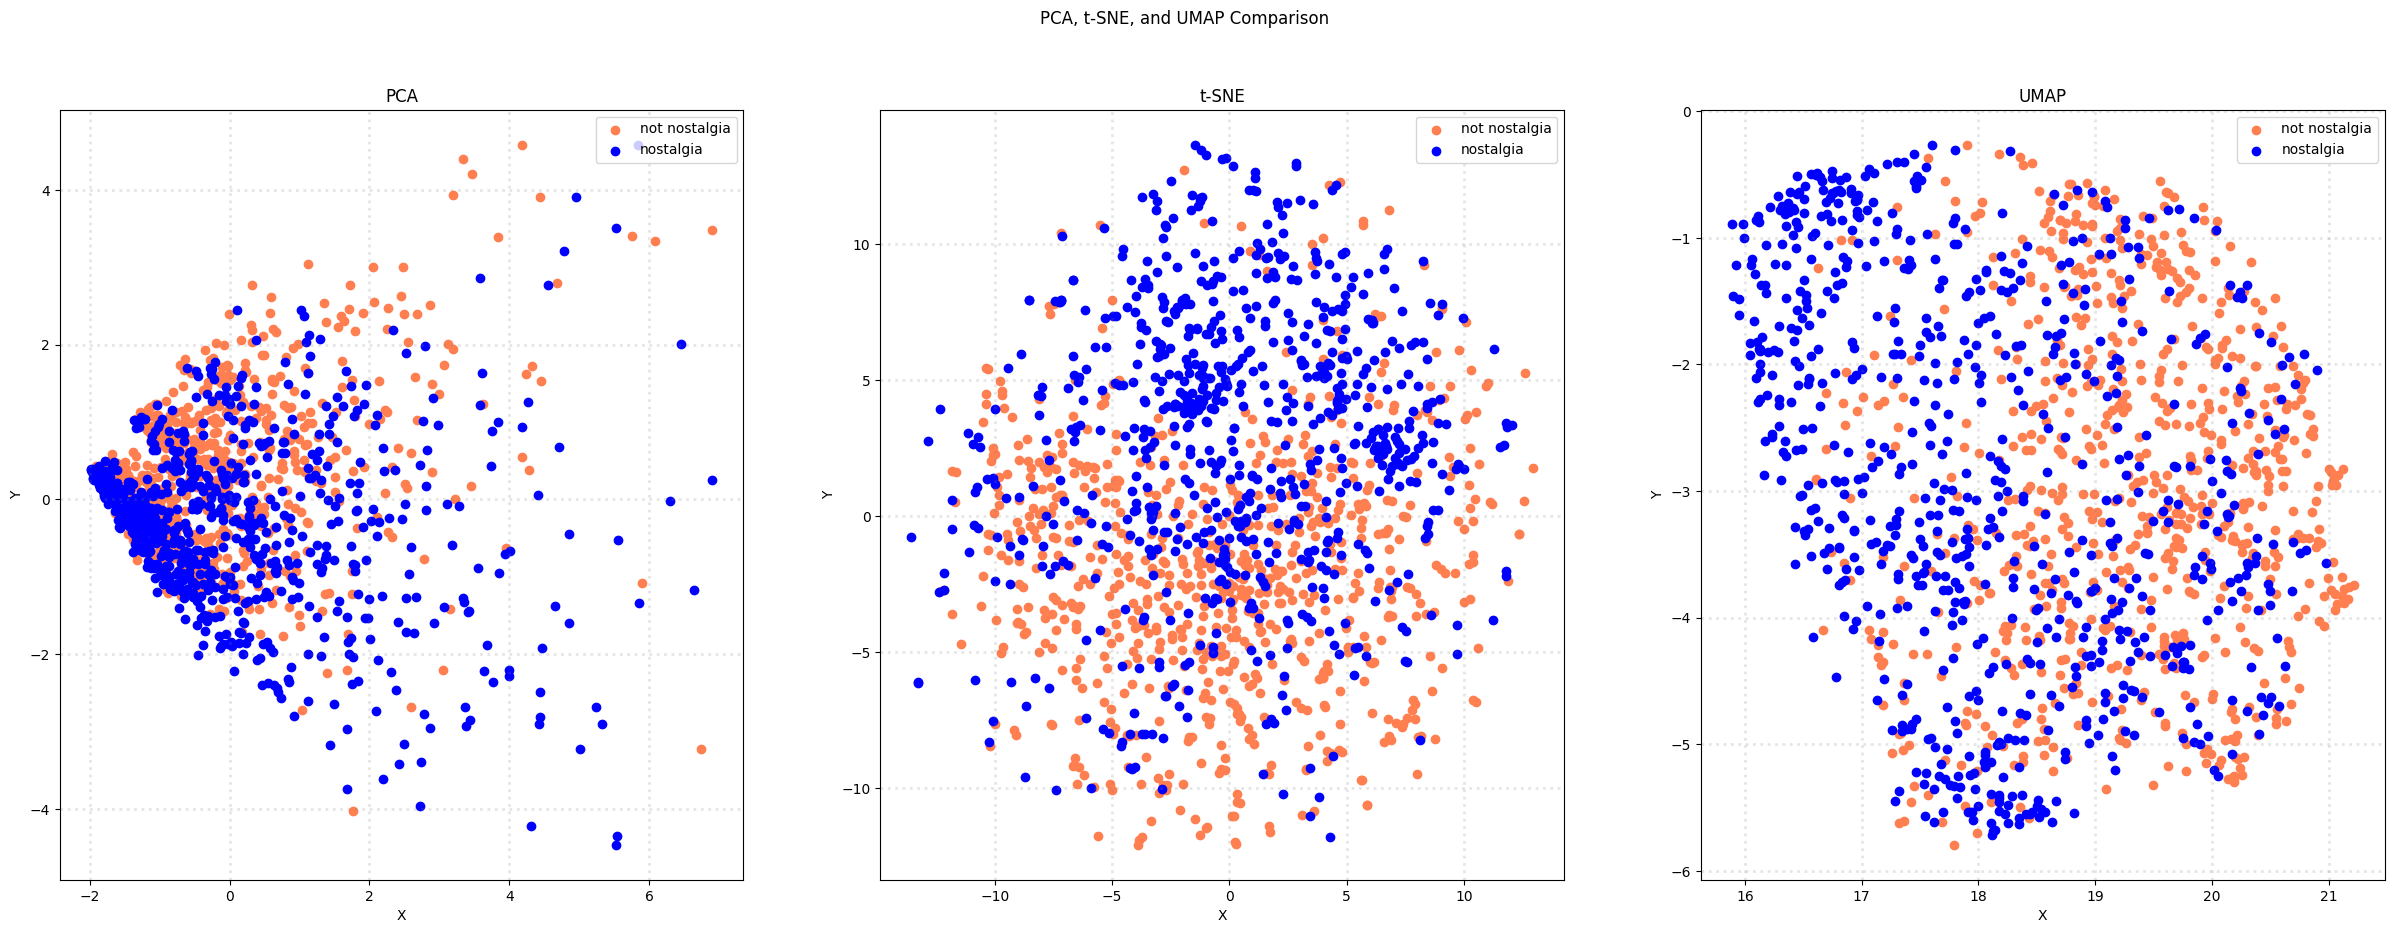

In [135]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

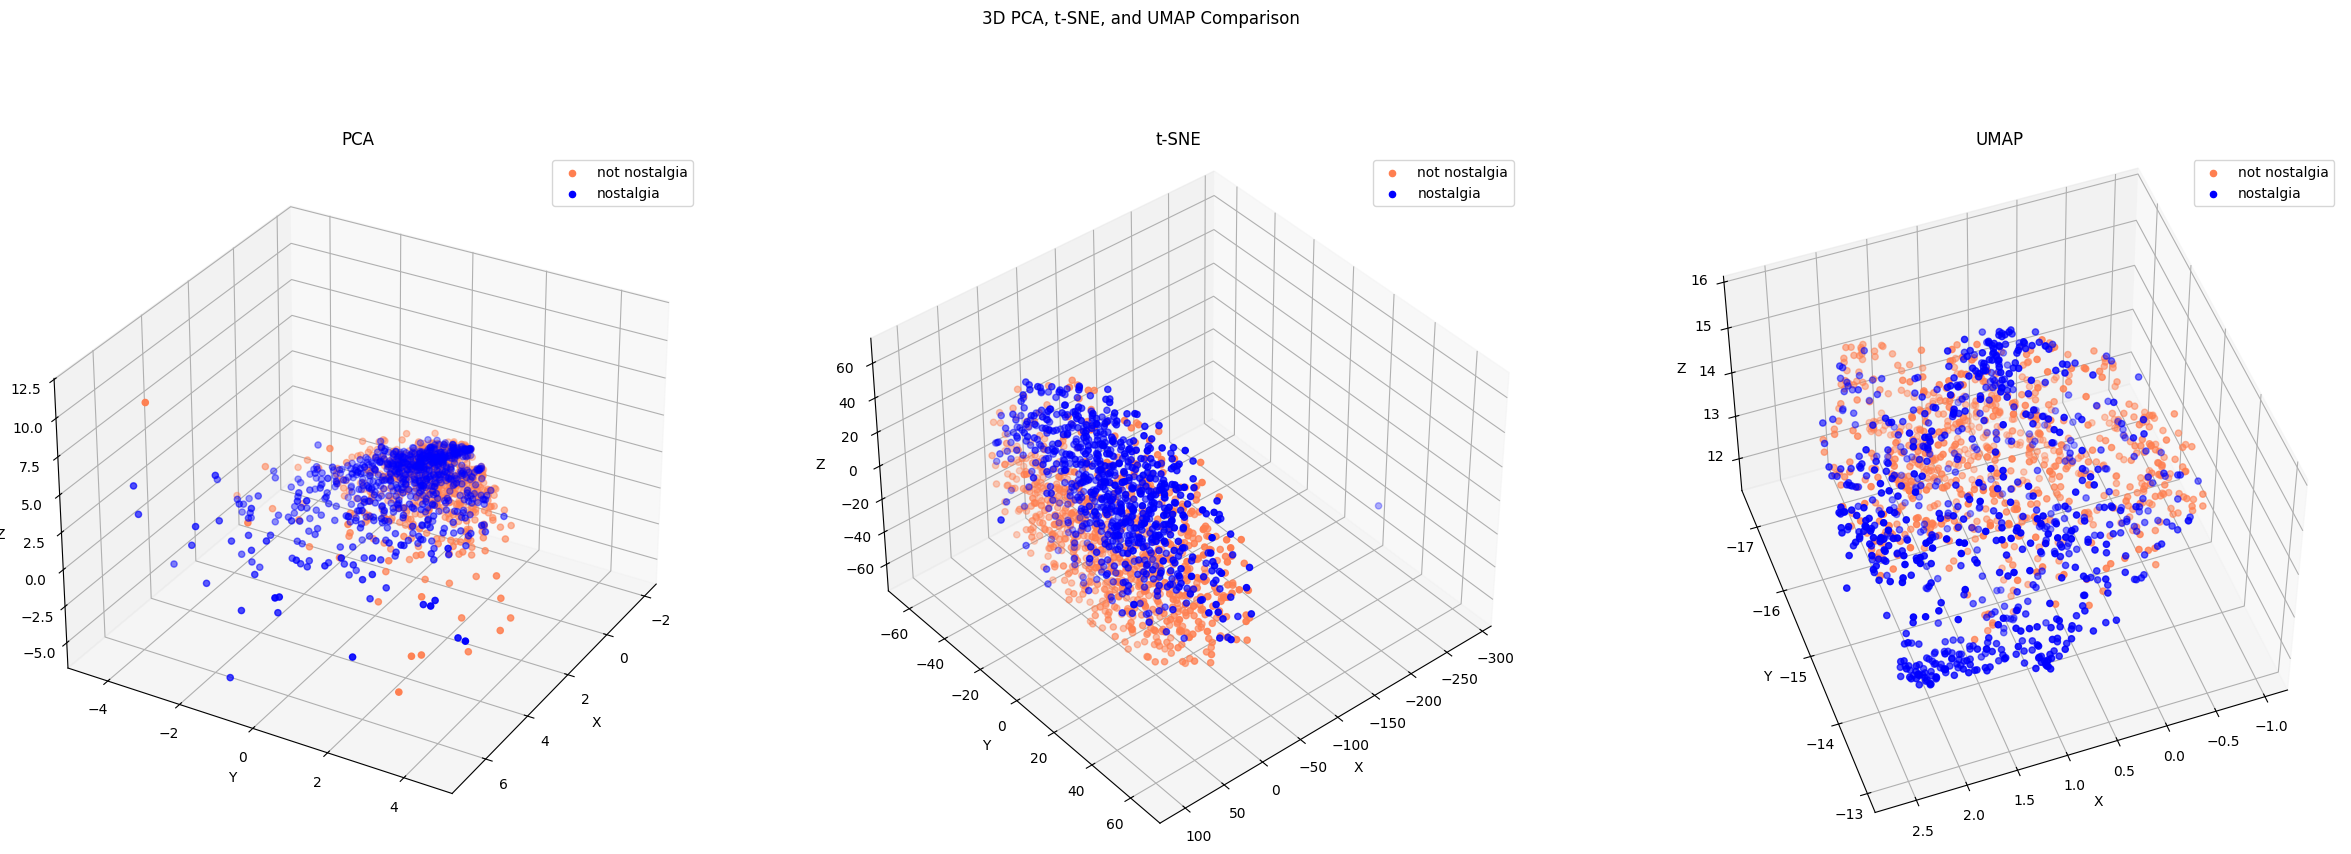

In [136]:
'''
Our finding:

'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(30, 10))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison')

# 定義 3D 散點圖繪製函數
def plot_3d_scatter(ax, X_reduced, title, elev=30, azim=30):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.view_init(elev=elev, azim=azim)  # 設置視角
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# 創建 3D 子圖並繪製每個降維方法的結果
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA', elev=30, azim=30)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE', elev=40, azim=50)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP', elev=50, azim=70)

plt.show()

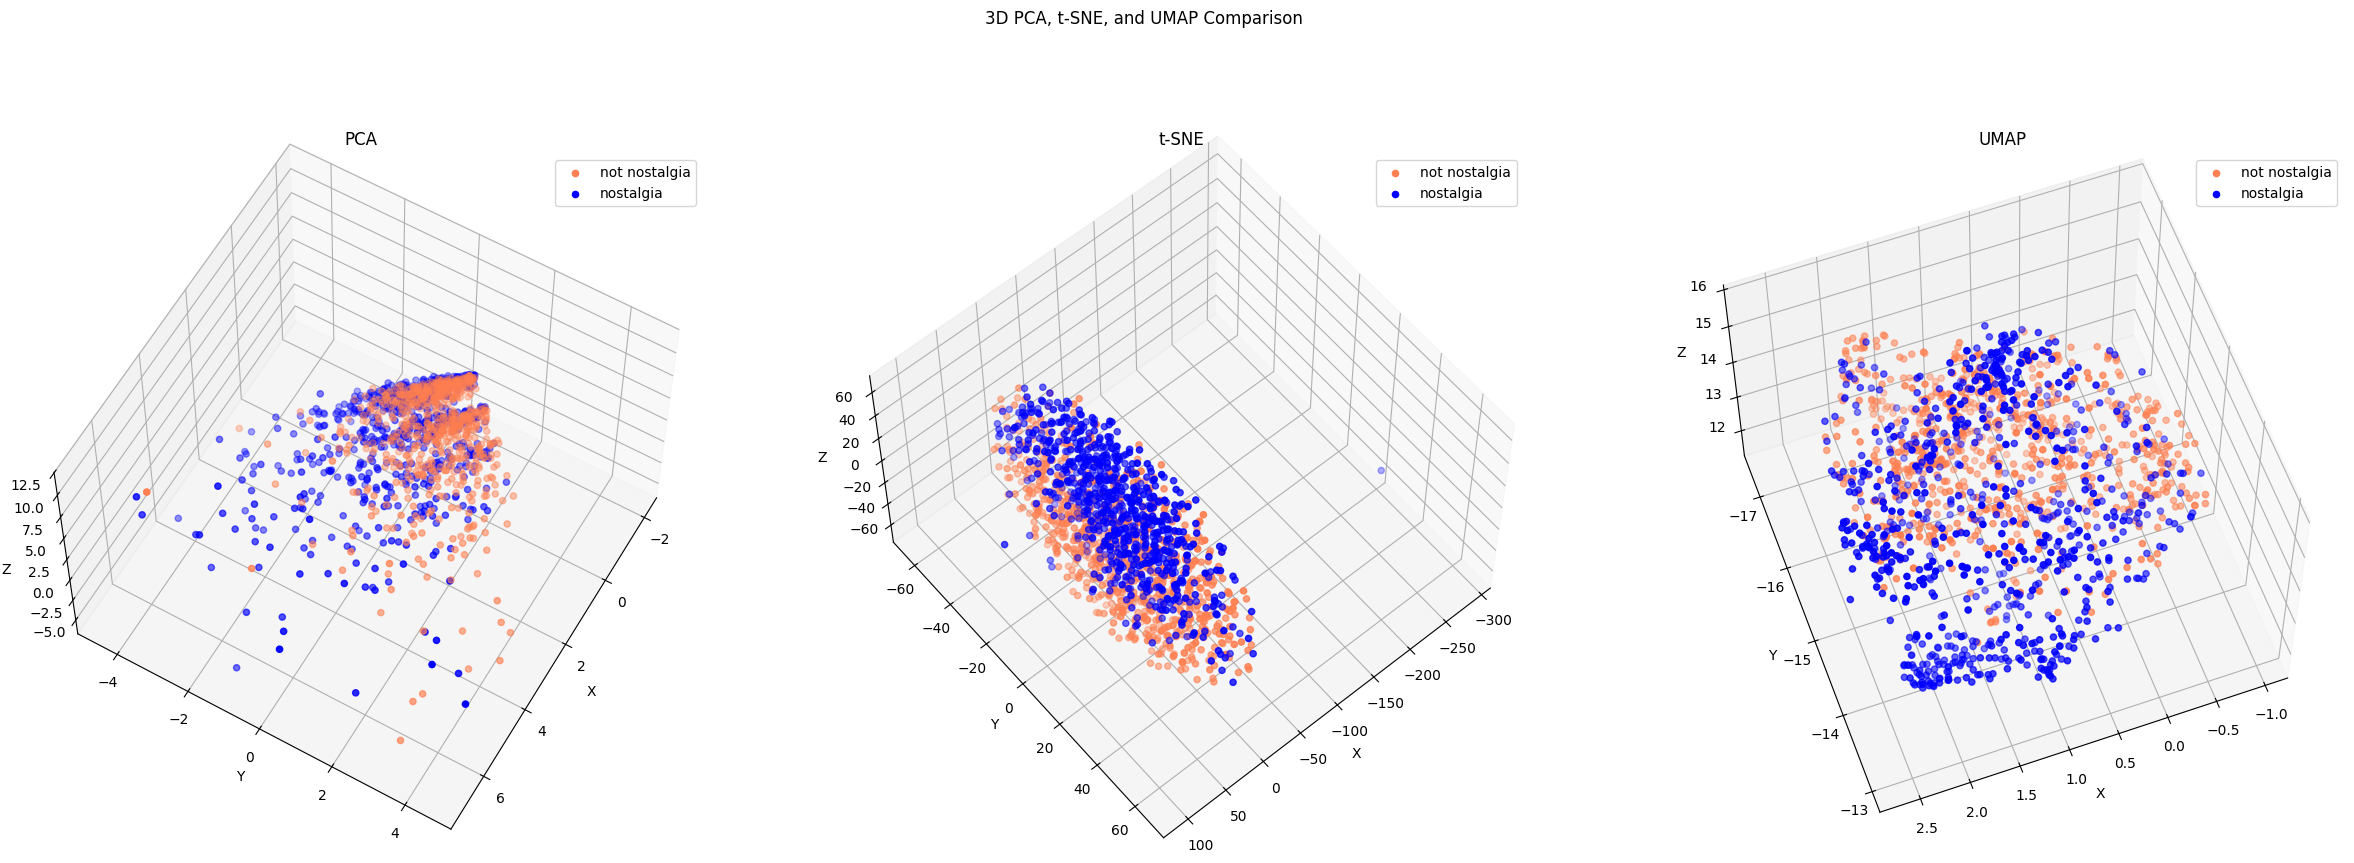

In [137]:
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig = plt.figure(figsize=(30, 10))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison')

ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA', elev=60, azim=30)

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE', elev=60, azim=50)

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP', elev=60, azim=70)

plt.show()

---

### 5.6 Discretization and Binarization

In [138]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [139]:
mlb = preprocessing.LabelBinarizer()

In [140]:
mlb.fit(X.category)

LabelBinarizer()

In [141]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [142]:
X[0:9]

category_name                                               text  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {16years, emotional, was, many, with, his, You...          [0]  
1  {was, singing, his, mist, of, when, voice, eve...          [1]  
2  {--, but, gentle, job, was, never, people, wit...          [1]  
3  {song, 47, from, years, can, hope, of, when, p...          [0]  
4  {me, him, my, to, reminds, his, mum, songs, ev...          [1]  
5  {me, cry....because, over, song, child,, many,...          [1]  
6  {me, but, things., was, 70's, changes, My, whe...          [1]  
7  {me, childhood, now, music., with, his, since,...          [1]  
8        {Wherever, my, are, you, heart, always, in}          [0]

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [143]:
'''
Ans:
it can work 
Reason:LabelBinarizer can use a series and transform it to binary one-hot encoding
'''

# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

category_name                                               text  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {16years, emotional, was, many, with, his, You...          [1]  
1  {was, singing, his, mist, of, when, voice, eve...          [0]  
2  {--, but, gentle, job, was, never, people, wit...          [0]  
3  {song, 47, from, years, can, hope, of, when, p...          [1]  
4  {me, him, my, to, reminds, his, mum, songs, ev...          [0]  
5  {me, cry....because, over, song, child,, many,...          [0]  
6  {me, but, things., was, 70's, changes, My, whe...          [0]  
7  {me, childhood, now, music., with, his, since,...          [0]  
8        {Wherever, my, are, you, heart, always, in}          [1]

---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [144]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [145]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [146]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [147]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_24344\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_24344\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_24344\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_24344\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

---

# 7. Data Classification
- **Multinomial Naive Bayes:**

In [148]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [149]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [150]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [151]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9463    0.8220    0.8798       236
    nostalgia     0.8286    0.9486    0.8845       214

     accuracy                         0.8822       450
    macro avg     0.8875    0.8853    0.8822       450
 weighted avg     0.8903    0.8822    0.8821       450



In [152]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [153]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  player  its  until  \
890    0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1397   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
709    0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1273   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
940    0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...    ...   
1132   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1296   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
862    0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1461   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1128   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   

      records  left  together  along  tv  karen  place  
890         0     0         0      0   0      0      0  
1397        0     0         0      0   0      0      0  
709         0     0         0      0   0      0      0  
1273        0     0         0      0   0      0      0  
940         0     0         0      0   0      0      0  
...       ...   ...       ...    ...  ..    ...    ...  
1132        0     0         0      0   0      0      0  
1296        0     0         0      0   0      0      0  
862         0     0         0      0   0      0      0  
1461        0     0         0      0   0      0      0  
1128        0     0         0      0   0      0      0  

[1048 rows x 3950 columns]

In [154]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  player  its  until  \
1035   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1307   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1437   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1491   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
790    0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...  ...    ...   
1231   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1275   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
484    0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
1329   0    0    0   0   0    0    0   0     0   0  ...       0    0      0   
201    0    0    0   0   0    0    0   0     0   0  ...       0    0      0   

      records  left  together  along  tv  karen  place  
1035        0     0         0      0   0      0      0  
1307        0     0         0      0   0      0      0  
1437        0     0         0      0   0      0      0  
1491        0     0         0      0   0      0      0  
790         0     0         0      0   0      0      0  
...       ...   ...       ...    ...  ..    ...    ...  
1231        0     0         0      0   0      0      0  
1275        0     0         0      0   0      0      0  
484         0     0         0      0   0      0      0  
1329        0     0         0      0   0      0      0  
201         0     0         0      0   0      0      0  

[450 rows x 3950 columns]

In [155]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8711111111111111

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9238    0.8220    0.8700       236
    nostalgia     0.8250    0.9252    0.8722       214

     accuracy                         0.8711       450
    macro avg     0.8744    0.8736    0.8711       450
 weighted avg     0.8768    0.8711    0.8710       450



-----

# 7.2 Data Classification with TD-IDF
- **Complement Naive Bayes:**

In [170]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, X['category'], test_size=0.3, random_state=42)

In [168]:
X_train

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
888   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1395  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
707   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1271  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
938   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1130  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1294  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
860   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1459  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1126  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
888     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1395    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
707     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1271    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
938     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1130    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1294    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
860     0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1459    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1126    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1048 rows x 3730 columns]

In [171]:
# Train the Naive Bayes classifier
nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_tfidf.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8711111111111111

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9495    0.7966    0.8664       236
    nostalgia     0.8095    0.9533    0.8755       214

     accuracy                         0.8711       450
    macro avg     0.8795    0.8749    0.8709       450
 weighted avg     0.8829    0.8711    0.8707       450



----

## 8. References

- Pandas cook book ([Recommended for starters](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html))
- [Pang-Ning Tan, Michael Steinbach, Vipin Kumar, Introduction to Data Mining, Addison Wesley](https://dl.acm.org/citation.cfm?id=1095618)